In [ ]:
'''
Script to convert GLB to OBJ with trimesh library

Try to solve the issue with the texture by using several ways. None of them, worked
'''

In [ ]:
import trimesh
import os
from loguru import logger
from pathlib import Path
import numpy as np
from trimesh.transformations import scale_matrix, translation_matrix
from pytorch3d.io import load_obj, save_obj, load_ply,load_objs_as_meshes
import torch
from glob import glob

In [2]:

from pytorch3d.structures import Meshes
import re
from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    FoVOrthographicCameras,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    SoftPhongShader,
    TexturesVertex,
    TexturesAtlas,
    Textures,
    PointsRenderer,
    PointsRasterizationSettings,
    PointsRasterizer
)

from pytorch3d.structures.meshes import (
    Meshes,
    join_meshes_as_batch,
    join_meshes_as_scene,
)

In [3]:
import trimesh
import os
from loguru import logger
from pathlib import Path
import numpy as np
from trimesh.transformations import scale_matrix, translation_matrix
from pytorch3d.io import load_obj, save_obj, load_ply,load_objs_as_meshes
import pytorch3d

from pytorch3d.renderer import (
    look_at_view_transform,
    FoVPerspectiveCameras,
    FoVOrthographicCameras,
    Materials,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    PointLights,
    SoftPhongShader,
    TexturesVertex,
    HardPhongShader,
    Textures,
    TexturesUV,
    TexturesAtlas,
    PointsRenderer,
    PointsRasterizationSettings,
    PointsRasterizer
)


from pytorch3d.structures import Meshes

import sys
sys.path.append("../")
from rendererClass import RendererClass

import matplotlib.pyplot as plt
import json
import itertools
import torch

# Trimesh: Export as OBJ

In [ ]:
'''
Summary of the results:
If we have one geometry it works smoothly (both for mesh and scene) --> Astronaut for instance works perfect
If there are several geometries, as mesh stores only the OBJ and as scene OBJ + mtl but not texture
So when importing with load_obj it gives error! 
solution: Work without textures for now
'''

In [51]:
def GLB_toOBJ(path_GLB, force_to = "mesh",save_name = None):
    
    logger.info(f"Loading from {path_GLB}")
    mesh = trimesh.load(path_GLB, force = force_to)
    
    
    #scene = trimesh.load(path_astronaut,force = force_to).dump()
    #combined = trimesh.util.concatenate(scene)
    #combined.export(save_path,include_texture=True)

    
    if save_name:
        
        path = Path(path_GLB).parent.absolute()
        
        save_path = os.path.join(path,force_to)
        os.mkdir(save_path) if not os.path.exists(save_path) else None
        logger.info(f'Save results to file: {save_path}')
        mesh.export(file_type="obj",
                    #resolver = trimesh.resolvers.nearby_names(save_path),
                    write_texture = True,
                    file_obj = os.path.join(save_path,save_name),
                    include_color=True,
                    include_texture=True)
        
        
    mesh_obj, textures = trimesh.exchange.obj.export_obj(mesh, return_texture=True)
    return mesh, mesh_obj, textures
    


In [ ]:
path_bed = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Bed/Single_Bed.gltf"
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"
path_astronaut = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Astronaut/Astronaut.glb"
part_kitchen = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/kitchen.glb"
path_banana = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Banana/banana.glb"
bottle = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/bottle/WaterBottle.glb"
path_apple = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Apple/apples.gltf"
parth_kitchen_2 = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/kitchen_v2/kitchen.glb"
path_ship_2 = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/ship_v2/uploads_files_2901006_ship.glb"
path_girl = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/girl/girl.glb"
force_to = "scene"
save_name = "GLB_to_OBJ_force_" + force_to +".obj"

mesh_trimesh, mesh_obj, textures = GLB_toOBJ(path_girl,force_to,save_name)


In [ ]:
force_to = "scene"
save_name = "GLB_to_OBJ_force_" + force_to +".obj"
path = Path(path_liberty).parent.absolute()
save_path = os.path.join(path,force_to,save_name)
print(save_path)

#load it back as obj 
try:
        verts, faces, aux = load_obj(
                save_path,
                device="cpu",
                load_textures=True,
                create_texture_atlas=True,
                texture_atlas_size=4,
                texture_wrap="repeat"
                )
except:
        print("An exception occur")
        verts, faces, aux = load_obj(
        save_path,
        device="cpu",
        load_textures=True)

In [39]:
verts, faces, aux = load_obj(
            save_path,
            device="cpu",
            load_textures=True)

/home/andstasi/anaconda3/envs/triton_inf/lib/python3.8/site-packages/pytorch3d/io/utils.py:66: UserWarning: Faces have invalid indices
  warnings.warn("Faces have invalid indices")


## From Obj to Obj

In [ ]:
'''
The issue is that even if we load it as a obj and export it as obj, the output is wrong....

'''

In [4]:
scene_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/Initial_scene/uploads_files_2550510_kitchen.obj"

scene = trimesh.load(scene_path, process=False,maintain_order=True)



specified material ((null))  not loaded!


In [ ]:
scene.export(os.path.join(Path(scene_path).parent.absolute(),'back_to_obj.obj'))

In [10]:
scene_obj = trimesh.load(os.path.join(Path(scene_path).parent.absolute(),'back_to_obj.obj'), process=False,maintain_order=True)

# Export the scene as a several meshes!

In [154]:
obj_kitchen = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/uploads_files_2550510_kitchen.obj"
glb_kitchen = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Kitchen/GLB_format/kitchen.glb"
path_apple = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Apple/apples.gltf"
path_liberty = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/Liberty_v4.glb"


In [155]:

scene = trimesh.load(path_liberty)

include_texture = True

save_path_init = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/merge_mesh_example"


for key,mesh in scene.geometry.items():
    
    save_path = os.path.join(save_path_init,re.sub(r'[^\w]', '', key))
    os.mkdir(save_path) if not os.path.exists(save_path) else None
    '''if include_texture and len(np.shape(getattr(mesh.visual, 'uv', None))) == 2:
        material = mesh.visual.material
    
    if hasattr(material, 'to_simple'):
        material = material.to_simple()'''
    
    
    mesh.export(write_texture = True,
                    file_obj = os.path.join(save_path,"kitchen" + key + ".obj"),
                    include_color=True,
                    include_texture=True)


primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL_TRIANGLES?
primitive has no mode! trying GL

In [156]:
#get all the obj ext
obj_files = []
for path in glob(os.path.join(save_path_init,"*/"), recursive = True):
    obj_files.append(glob(os.path.join(path,"*.obj")))

In [ ]:
# import them again from the object
all_meshes = []

for mesh_file in obj_files:
    
    print(mesh_file)
    if mesh_file == '/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/data/random_example/Liberty/merge_mesh_example/Athenea001/kitchenAthenea.001.obj': 
        pass
    else:
        all_meshes.append(load_objs_as_meshes(mesh_file, device=device))
    

In [125]:
mesh = join_meshes_as_scene(all_meshes, include_textures = False)

In [126]:
param_path = "/home/andstasi/Projects/MediaVerse/3D_to_2D_converter/pytorch3d-renderer/params_inference.json"
with open(param_path) as f:
    params = json.load(f)

device = "cuda:0"
#load the pars to render 3D
all_dist = params["camera_dist"]
all_elev = params["elevation"]
all_azim = params["azim_angle"]

#get all combinations
all_combs =  list(itertools.product(*[all_dist,all_elev,all_azim]))

In [149]:
dist,elev,azim = all_combs[0]
image_size = 1024

R, T = look_at_view_transform(dist=100, elev=elev, azim=azim)
cameras = FoVPerspectiveCameras(device=device, R=R, T=T)
raster_settings = RasterizationSettings(
    image_size=image_size,
    blur_radius=0.0,
    clip_barycentric_coords=True,
    faces_per_pixel=1,
)
# Initialize rasterizer by using a MeshRasterizer class
rasterizer = MeshRasterizer(
    cameras=cameras,
    raster_settings=raster_settings
)
# The textured phong shader interpolates the texture uv coordinates for
# each vertex, and samples from a texture image.
shader = HardPhongShader(device=device, cameras=cameras,lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]]))

# Create a mesh renderer by composing a rasterizer and a shader
renderer = MeshRenderer(rasterizer, shader)

In [150]:
color = torch.ones(1, mesh.verts_list()[0].shape[0], 3, device=device)
#features = torch.from_numpy(np.array(aux.texture_images.values(),dtype='float32'))[None]
mesh.textures = TexturesVertex(verts_features=color)

In [151]:
image = renderer(mesh.extend(1))[0, ..., :3].cpu().numpy()

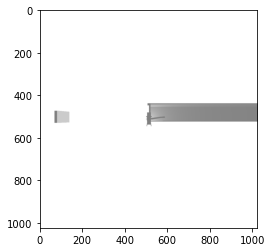

In [152]:
plt.imshow(image)
plt.show()